---
title: Working with pyCATHY and DA with ERT datasets
subtitle: PART3 - plotting the **Archie** transformation results
license: CC-BY-4.0
github: https://github.com/BenjMy/ETH_pyCATHY/
subject: Tutorial
authors:
  - name: Benjamin Mary
    email: benjamin.mary@ica.csic.es
    corresponding: true
    orcid: 0000-0001-7199-2885
    affiliations:
      - ICA-CSIC
date: 2024/04/12
---

The notebooks describe: 

**Plot outputs**: analysis of the results
   - [Saturation with uncertainties](plot_states)
   - [Parameters convergence](Parm_evol)
   - [Assimilation performance](DA_perf)

In [122]:
import pyCATHY
from pyCATHY import cathy_tools
from pyCATHY.DA.cathy_DA import DA, dictObs_2pd
from pyCATHY.DA.perturbate import perturbate_parm
from pyCATHY.DA import perturbate
from pyCATHY.DA.observations import read_observations, prepare_observations, make_data_cov
from pyCATHY.DA import performance
import pyvista as pv
import pyCATHY.plotters.cathy_plots as cplt 
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# set some default plotting parameters for nicer looking plots
mpl.rcParams.update({"axes.grid":True, 
                     "grid.color":"gray", 
                     "grid.linestyle":'--',
                     'figure.figsize':(6,6)}
                   )
import pandas as pd
import utils

In [123]:
import pygimli as pg 
from pygimli.physics import ert

(plot_results)=
# Analysis of the results

## Reload solution

In [124]:
simu_solution = cathy_tools.CATHY(
                                    dirName='./solution_ERT',
                                    prj_name= 'weill_dataset',
                                    notebook=True,
                                  )
sw_SOL, sw_SOL_times = simu_solution.read_outputs('sw')
psi_SOL = simu_solution.read_outputs('psi')

rootMap, rootMap_hd = simu_solution.read_inputs('root_map')

soil_SPP_SOL, soil_FP_SOL = simu_solution.read_inputs('soil',
                                                         MAXVEG=int(np.max(rootMap)),
                                                    )
PERMX_SOL = soil_SPP_SOL['PERMX'].unique()[0]
POROS_SOL = soil_SPP_SOL['POROS'].unique()[0]

🏁 Initiate CATHY object

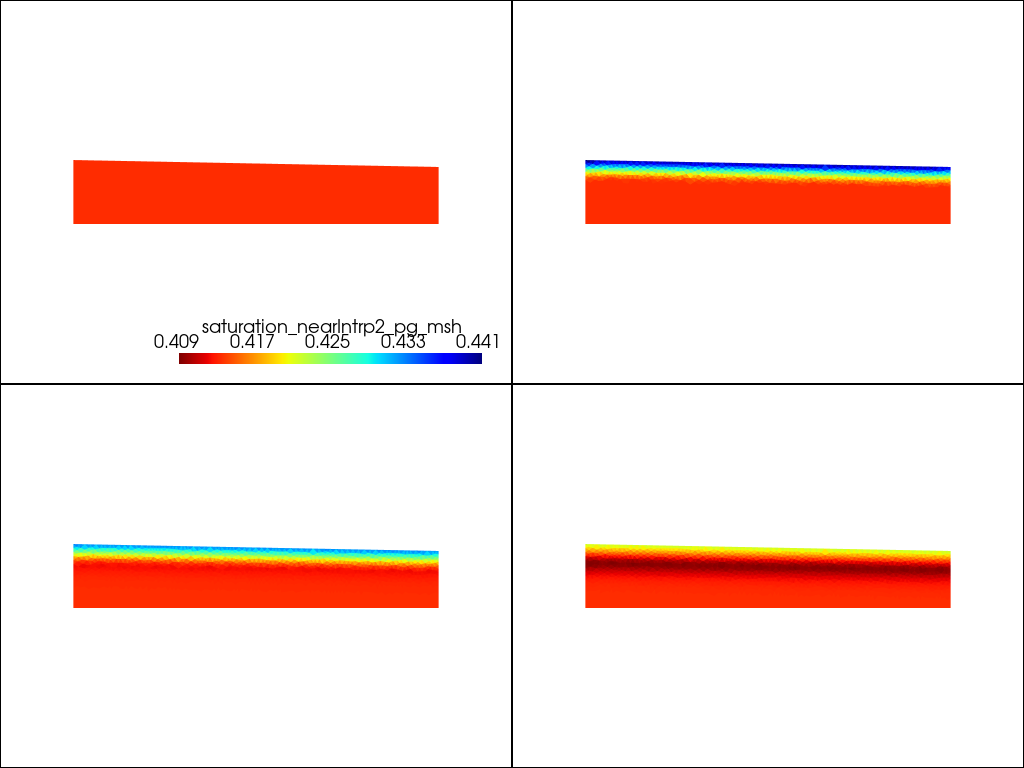

In [125]:
pl = pv.Plotter(shape=(2, 2))
axis_pl = [(0,0),(0,1),(1,0),(1,1)]
for i, j in enumerate([0,2,5,10]):
    mesh = pv.read(os.path.join(simu_solution.workdir,
                                'solution_ERTsaturation_nearIntrp2_pg_msh' + str(j) + '.vtk',
                                )
    
           )
    pl.subplot(axis_pl[i][0],axis_pl[i][1])
    pl.add_mesh(mesh,
               scalars='saturation_nearIntrp2_pg_msh',
                lighting=False,
                cmap="jet_r"
               )
    pl.view_xz()
pl.show()

## Going further with pygimli Time Lapse

In case we want to see the results in term of ER, we can invert the apparent resistivities. See: https://www.pygimli.org/_examples_auto/3_ert/plot_09_timelapse.html

```
for i in range(10):
    rhoa = pg.load('filenameRhoa_synthetic')
    DATA.append(rhoa)

tl = ert.TimelapseERT(DATA)
tl.invert(zWeight=0.3, lam=100)
tl.showAllModels();
```

## Reload DA results

In [126]:
simuWithDA = DA(
                        dirName='./DA_ERT',
                        prj_name= 'Weill_example_withDA',
                        notebook=True,
                    )
simuWithoutDA = DA(
                        dirName='./DA_ERT',
                        prj_name= 'Weill_example_withoutDA',
                        notebook=True,
                    )

🏁 Initiate CATHY object

🏁 Initiate CATHY object

In [127]:
results_withDA = simuWithDA.load_pickle_backup()
results_withoutDA = simuWithoutDA.load_pickle_backup()

In [128]:
observations = dictObs_2pd(results_withDA['dict_obs'])
observations.xs('ERT',0).iloc[0]['elecs']

array([[ 0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1.5,  0. ,  0. ],
       [ 2. ,  0. ,  0. ],
       [ 2.5,  0. ,  0. ],
       [ 3. ,  0. ,  0. ],
       [ 3.5,  0. ,  0. ],
       [ 4. ,  0. ,  0. ],
       [ 4.5,  0. ,  0. ],
       [ 5. ,  0. ,  0. ],
       [ 5.5,  0. ,  0. ],
       [ 6. ,  0. ,  0. ],
       [ 6.5,  0. ,  0. ],
       [ 7. ,  0. ,  0. ],
       [ 7.5,  0. ,  0. ],
       [ 8. ,  0. ,  0. ],
       [ 8.5,  0. ,  0. ],
       [ 9. ,  0. ,  0. ],
       [ 9.5,  0. ,  0. ],
       [10. ,  0. ,  0. ]])

In [129]:
results_withDA.keys()

dict_keys(['meta_DA', 'dict_parm_pert', 'df_DA', 'dict_obs', 'df_performance', 'Archie'])

In [130]:
Archie = results_withDA['Archie']
Archie_ER = Archie.set_index(['time','ens_nbi'])
Archie_ER

ens_nb        sw  ER_converted   OL  porosity
time ens_nbi                                              
0.0  0.0        NaN  0.605203     33.105120  0.0      0.55
     0.0        NaN  0.606914     32.946608  0.0      0.55
     0.0        NaN  0.607110     32.928546  0.0      0.55
     0.0        NaN  0.607213     32.919079  0.0      0.55
     0.0        NaN  0.607304     32.910675  0.0      0.55
...             ...       ...           ...  ...       ...
8.0  31.0       NaN  0.272770    128.313570  0.0      0.55
     31.0       NaN  0.272770    128.313570  0.0      0.55
     31.0       NaN  0.272770    128.313570  0.0      0.55
     31.0       NaN  0.272770    128.313650  0.0      0.55
     31.0       NaN  0.272770    128.313730  0.0      0.55

[1305360 rows x 5 columns]

In [131]:
Archie.time.unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [132]:
meanArchie = Archie.groupby('time')['ER_converted'].mean()
minArchie = Archie.groupby('time')['ER_converted'].min()
maxArchie = Archie.groupby('time')['ER_converted'].max()
minArchie

time
0.0    14.097021
1.0    14.097021
2.0    86.856515
3.0    86.856515
4.0    86.856515
5.0    86.856515
6.0    86.856515
7.0    86.856515
8.0    86.856515
Name: ER_converted, dtype: float64

Text(0, 0.5, 'ER converted')

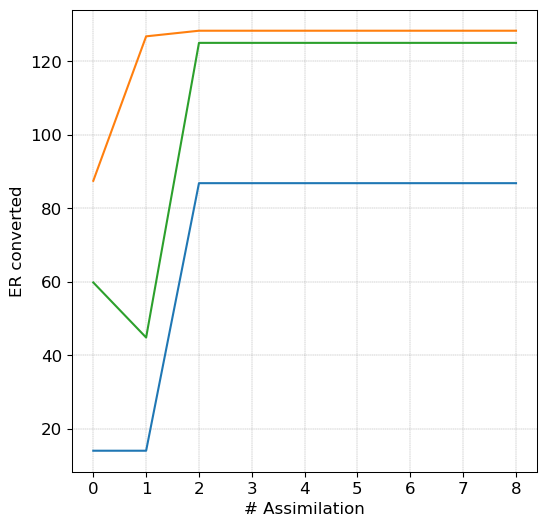

In [133]:
fig, ax = plt.subplots()
minArchie.plot(ax=ax)
maxArchie.plot(ax=ax)
meanArchie.plot(ax=ax)
ax.set_xlabel('# Assimilation')
ax.set_ylabel('ER converted')


## Plot 1:1 line between observed ER and estimated ER

In [135]:
Archie['ER_converted']

0        33.105120
1        32.946608
2        32.928546
3        32.919079
4        32.910675
           ...    
7051    128.313570
7052    128.313570
7053    128.313570
7054    128.313650
7055    128.313730
Name: ER_converted, Length: 1305360, dtype: float64

In [ ]:
pg.load(Load here the apparent solution data)